In [6]:
import pandas as pd
import numpy as np


In [7]:
import os
def list_files(startpath):
    dircount = 0
    filecount = 0
    for root, dirs, files in os.walk(startpath):
        dircount += len(dirs)
        filecount += len(files)
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print("D"+'{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
    print("{} files in {} folders".format(filecount, dircount))

list_files('./Data Drive 1')

DData Drive 1/
D    Defects_X7/
D        E MA FM/
D        ELD blow/
D        ELD FM/
D        EMA blow/
D    MC-5/
D        RTB6O0EMA3AJ1 295_90 R 20  EMA-D/
D        RTB6R0ELD1AJ1 295_90R20 ELD/
D    MC-6/
D        RTB6O0EMA3AJ1 295_90 R 20  EMA-D/
D        RTB6R0ELD1AJ1 295_90R20 ELD/
D            NCT2/
D            OK/
D        RTBJBHELD9AK1 10 R20 ELD/
D            NCT2/
D            OK/
D    MC-7/
D        RTB6O0EMA3AJ1_295_90 R 20  EMA-D/
D            OK/
D        RTB6R0ELD1AJ1_295_90R20 ELD/
D            OK/
D        RTBJBHELD9AK1_10 R20 ELD/
D            NCT2/
D            OK/
D    RTB6O0EMA3AJ1_defect_tyres/
D        Blow/
D            X5/
D            X6/
D            X8/
D            X9/
D        FM/
D            X5/
D            X6/
D            X8/
D            X9/
D    RTBJBHELD9AK1_Blow_defect_tyres/
D        X5/
D        X6/
D        X8/
D        X9/
D    RTBJBHELD9AK1_fm_defect_tyres/
D        X5/
D        X6/
D        X8/
D        X9/
D    RTBJBHEM32AK1_defect_tyres/

In [8]:
list_files('./Data Drive 2')

DData Drive 2/
D    Bodyply Spacing/
D    Bp stetch/
444 files in 2 folders


In [9]:
list_files('./Data Drive 2/Bodyply Spacing')

DBodyply Spacing/
220 files in 0 folders


In [10]:
from PIL import Image

arr_of_diagonals= []

im = Image.open('./Data Drive 2/Bodyply Spacing/2021-11-15 21-27-12 - recRTB6R0EML1AJ1 - 8310257379_Az0.00_Undef.tif')
width, height = im.size
print(width)
print(height)
arr_of_diagonals += [np.sqrt(width**2 + height**2)]

print(arr_of_diagonals)

3344
8475
[9110.870485304904]


In [11]:
from pathlib import Path


arr_of_diagonals= []


pathlist = Path('./Data Drive 2/Bodyply Spacing/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals += [np.sqrt(width**2 + height**2)]

print(len(arr_of_diagonals))
print(arr_of_diagonals)


220
[9268.99271765816, 9268.99271765816, 9268.99271765816, 9268.99271765816, 9268.99271765816, 9471.630588235586, 8969.828649422463, 9416.72050132104, 9416.72050132104, 9268.99271765816, 9416.72050132104, 9354.425369845012, 9315.407988918145, 9416.72050132104, 8981.33364261678, 8981.33364261678, 9354.425369845012, 8981.33364261678, 9416.72050132104, 9371.87179809882, 7327.748426358536, 9014.117372211214, 9014.117372211214, 9086.853635885196, 9112.514965694158, 9416.72050132104, 7535.444777848219, 9332.54654421825, 9371.87179809882, 8945.594781790644, 9110.870485304904, 9332.54654421825, 9014.117372211214, 8410.645635145973, 9245.799100131908, 9346.45708276671, 9471.630588235586, 9393.4684754887, 9091.189416132524, 9085.771843932687, 9549.89183184815, 9245.799100131908, 9471.630588235586, 7535.444777848219, 9245.799100131908, 9014.117372211214, 9416.72050132104, 9116.018264571436, 8827.089950827509, 9393.4684754887, 9432.53698641039, 9416.72050132104, 8827.089950827509, 8827.08995082750

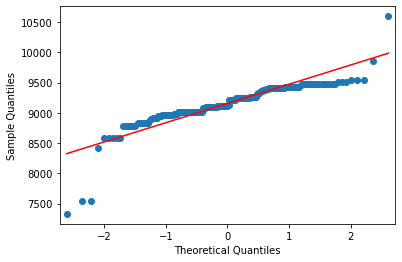

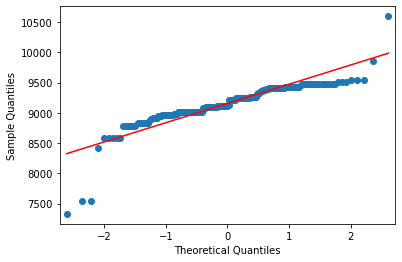

In [12]:
from statsmodels.graphics.gofplots import qqplot
qqplot(np.asarray(arr_of_diagonals), line='s')


QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

In [13]:

# Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p = shapiro(np.asarray(arr_of_diagonals))
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.821, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:

# D'Agostino and Pearson's Test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(arr_of_diagonals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=110.883, p=0.000
Sample does not look Gaussian (reject H0)


(array([ 1.,  2.,  0.,  0.,  0.,  0.,  1.,  5.,  6., 16., 80., 39., 45.,
        23.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 7327.74842636,  7491.26049079,  7654.77255523,  7818.28461966,
         7981.79668409,  8145.30874853,  8308.82081296,  8472.3328774 ,
         8635.84494183,  8799.35700626,  8962.8690707 ,  9126.38113513,
         9289.89319956,  9453.405264  ,  9616.91732843,  9780.42939287,
         9943.9414573 , 10107.45352173, 10270.96558617, 10434.4776506 ,
        10597.98971504]),
 <BarContainer object of 20 artists>)

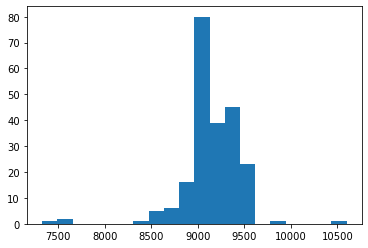

In [15]:
import matplotlib.pyplot as plt
plt.hist(arr_of_diagonals, 20)

In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous, see Section 2.2), one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test), or to compare two samples (two-sample K–S test). In essence, the test answers the question "What is the probability that this collection of samples could have been drawn from that probability distribution?" or, in the second case, "What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?".

can compare the p-value to a level of significance a, usually a=0.05 or 0.01 (you decide, the lower a is, the more significant). If p-value is lower than a, then it is very probable that the two distributions are different.

In [16]:
from pathlib import Path


arr_of_diagonals_defect= []

pathlist = Path('./Code/Transfer Learning MobileNet Classification/img_dataset/bodyply-spacing-defect/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_defect += [np.sqrt(width**2 + height**2)]

arr_of_diagonals_non_defect= []

pathlist = Path('./Code/Transfer Learning MobileNet Classification/img_dataset/non-defect/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_non_defect += [np.sqrt(width**2 + height**2)]



In [17]:
from scipy.stats import ks_2samp
import numpy as np

print(ks_2samp(arr_of_diagonals_defect, arr_of_diagonals_non_defect))


KstestResult(statistic=0.6484018264840182, pvalue=1.6653345369377348e-15)


Conclusion - The distributions are different.

In [18]:
from pathlib import Path


arr_of_diagonals_defect= []

pathlist = Path('./Data Drive 2/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_defect += [np.sqrt(width**2 + height**2)]

arr_of_diagonals_non_defect= []

pathlist = Path('./Data Drive 1/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_non_defect += [np.sqrt(width**2 + height**2)]

print(ks_2samp(arr_of_diagonals_defect, arr_of_diagonals_non_defect))

KstestResult(statistic=0.31793100303258315, pvalue=8.881784197001252e-16)


In [19]:
from pathlib import Path


arr_of_diagonals_defect= []

pathlist = Path('./Data Drive 2/Bodyply Spacing/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_defect += [np.sqrt(width**2 + height**2)]

arr_of_diagonals_non_defect= []

pathlist = Path('./Data Drive 2/Bp stetch/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_of_diagonals_non_defect += [np.sqrt(width**2 + height**2)]

print(ks_2samp(arr_of_diagonals_defect, arr_of_diagonals_non_defect))

KstestResult(statistic=0.13136975132490827, pvalue=0.03842375075884208)


In [20]:
from pathlib import Path


arr_data2= []

pathlist = Path('./Data Drive 2/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_data2 += [np.sqrt(width**2 + height**2)]




In [21]:
import random


random.shuffle(arr_data2)

length = len(arr_data2)
middle_index = length//2

first_half = arr_data2[:middle_index]
second_half = arr_data2[middle_index:] 
print(ks_2samp(first_half, second_half))

KstestResult(statistic=0.07959316782846194, pvalue=0.44679599075338106)


In [22]:
arr_data1= []

pathlist = Path('./Data Drive 1/').rglob('*.tif')
for path in pathlist:
     path_in_str = str(path)
     im = Image.open('./' + path_in_str.replace('\\', "/"))
     width, height = im.size
     arr_data1 += [np.sqrt(width**2 + height**2)]

In [23]:
import random


random.shuffle(arr_data1)

length = len(arr_data1)
middle_index = length//2

first_half = arr_data1[:middle_index]
second_half = arr_data1[middle_index:] 
print(ks_2samp(first_half, second_half))

KstestResult(statistic=0.03896103896103896, pvalue=0.6692881515168144)


In [24]:
import scipy.stats as sp
sp.skew(arr_data1)

-2.47044728792817

Highly negatively skewed

In [25]:
sp.kurtosis(arr_data1)

9.974419188428593

High kurtosis 

In [26]:
print(sp.skew(arr_data2))
print(sp.kurtosis(arr_data2))

-1.3485526887918347
11.008399084748172


## Conclusion:
- Dimentions are not normally distributed 
- dimentions from drive 1 and 2 are from a different parent distribution 
- dimentions of subsets used in Imagenet are from differnt distributions. 
- Dimentions have high negative skew and high kurtosis
- High Kurtosis, so can capture most of the dimentions by choosing an optimal one to crop to


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  6.,
         0.,  0.,  1.,  1.,  0.,  6.,  0., 10.,  9., 13.,  3., 17., 63.,
         4.,  1., 68.,  2.,  0., 15., 38., 16.,  5.,  9.,  6., 28., 57.,
        39.,  5.,  0.,  3.,  1.,  0.,  3.,  3.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 7308.97810915,  7341.86822521,  7374.75834127,  7407.64845732,
         7440.53857338,  7473.42868944,  7506.3188055 ,  7539.20892156,
         7572.09903762,  7604.98915368,  7637.87926974,  7670.7693858 ,
         7703.65950185,  7736.54961791,  7769.43973397,  7802.32985003,
         7835.21996609,  7868.11008215,  7901.00019821,  7933.89031427,
         7966.78043033,  7999.67054638,  8032.56066244,  8065.4507785 ,
  

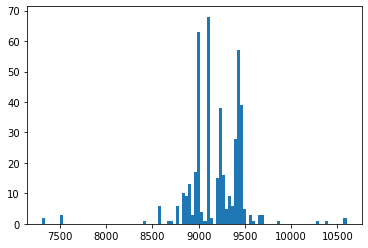

In [32]:
plt.hist(arr_data2, 100)

(array([ 14.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         12., 292.,   0.,   0.,   0.,   0.,   0.,   0., 138., 224.,   0.,
          0.,   0.,   0.,   0., 224., 471.]),
 array([8350.29514448, 8371.93998132, 8393.58481816, 8415.229655  ,
        8436.87449184, 8458.51932868, 8480.16416552, 8501.80900235,
        8523.45383919, 8545.09867603, 8566.74351287, 8588.38834971,
        8610.03318655, 8631.67802339, 8653.32286022, 8674.96769706,
        8696.6125339 , 8718.25737074, 8739.90220758, 8761.54704442,
        8783.19188125, 8804.83671809, 8826.48155493, 8848.12639177,
        8869.77122861, 8891.41606545, 8913.06090229, 8934.70573912,
        8956.35057596, 8977.9954128 , 8999.64024964, 9021.28508648,
        9042.92992332, 9064.57476016, 9086.21959699, 9107.86443383,
        9129.50927067, 9151.15410751, 9172.798

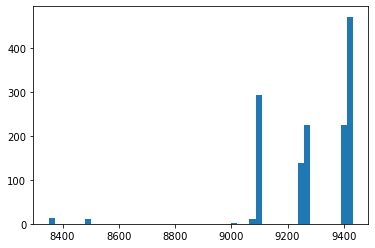

In [30]:
plt.hist(arr_data1, 50)